# Libraries

In [32]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Pre-processing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# ML library
from xgboost import XGBClassifier
# Time
import time
# Dask 
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
from dask_ml.model_selection import train_test_split
from dask_ml.wrappers import ParallelPostFit
from xgboost.dask import DaskXGBClassifier
import dask.array as da

# Reading Data

In [2]:
file_path = '/home/ismail/Desktop/PDC_Project/data/cleaned_data.csv'

df = pd.read_csv(file_path)

df.head()

,feature_1,feature_2,feature_7,target,f4_by_f6,feature_7_bin_medium,feature_7_bin_high,cost_per_unit,feature_1 feature_2
0,27.750000,55.00000,44.16,0,109.497363,0,1,109.497363,1526.250000
1,31.330000,39.00000,13.93,1,209.976975,1,0,209.976975,1221.870000
2,23.870000,10.00000,15.16,0,341.174147,1,0,341.174147,238.700000
3,35.640000,34.00000,15.71,1,365.516586,1,0,365.516586,1211.760000
4,29.990843,49.43656,13.77,1,88.826139,1,0,88.826139,1482.644124


# XGBoost 

/home/ismail/Desktop/PDC_Project/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:18:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.5624
F1 Score: 0.3369
Confusion Matrix:
[[3657 1236]
 [2310  901]]

Total Processing Time: 53.40 seconds


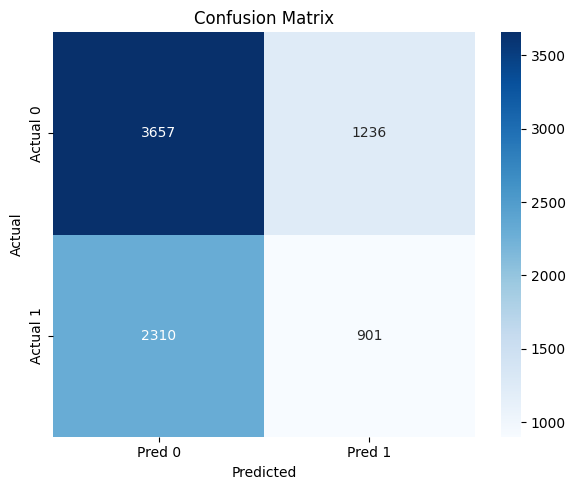

In [62]:
start = time.time()

# 3. Split features and target
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 4. Train XGBoost model
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',        
    n_estimators=1000,
    max_depth = 13,
    learning_rate=0.03,   
    random_state=42
)
model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

end = time.time()

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"\nTotal Processing Time: {end - start:.2f} seconds")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Logistic Regression

In [4]:
start = time.time()

# Final Split - Separate features and target:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 4. Train Logistic Regression model
model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

# 5. Make predictions
y_pred = model.predict(X_test)

# 6. Evaluate the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

end = time.time()

print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print(f"\nTotal Processing Time: {end - start:.2f} seconds")

Accuracy: 0.5095
F1 Score: 0.4361
Confusion Matrix:
[[2623 2304]
 [1718 1555]]

Total Processing Time: 0.75 seconds


/home/ismail/Desktop/PDC_Project/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [ ]:
start = time.time()

# Final Split - Separate features and target:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# 4. Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 5. Train Random Forest model
model = RandomForestClassifier(
    class_weight="balanced",
    n_estimators=100, 
    random_state=42
)
model.fit(X_train, y_train)

# 6. Make predictions
y_pred = model.predict(X_test)

# 7. Evaluate
acc = round(accuracy_score(y_test, y_pred), 1)
f1 = round(f1_score(y_test, y_pred), 1)
cm = confusion_matrix(y_test, y_pred)

end = time.time()
seq_time = end - start

print(f"Accuracy: {acc*100} %")
print(f"F1 Score: {f1*100} %")
print("Confusion Matrix:")
print(cm)
print(f"\nTotal Processing Time: {seq_time:.2f} seconds")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Accuracy: 60.0 %
F1 Score: 30.0 %
Confusion Matrix:
[[3969  924]
 [2486  725]]

Total Processing Time: 10.41 seconds


# Parallel Section

In [38]:
file_path = '/home/ismail/Desktop/PDC_Project/data/cleaned_data.csv'

df = dd.read_csv(file_path)

df.head()

# Convert to Pandas for resampling
pdf = df.compute()

# Creating Cluster

In [58]:
# Start local Dask cluster
cluster = LocalCluster()
client = Client(cluster)

client.cluster

/home/ismail/Desktop/PDC_Project/venv/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35709 instead
  warnings.warn(


LocalCluster(be60985e, 'tcp://127.0.0.1:42193', workers=4, threads=16, memory=11.01 GiB)

In [ ]:
print(f"Dashboard link: {client.dashboard_link}")

start = time.time()

# Final Split - Separate features and target:
X = pdf.drop('target', axis=1)
y = pdf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Train Random Forest model using Dask's ParallelPostFit wrapper
model = ParallelPostFit(estimator=RandomForestClassifier(
    class_weight="balanced", 
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1)
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
acc = round(accuracy_score(y_test, y_pred), 1)
f1 = round(f1_score(y_test, y_pred), 1)
cm = confusion_matrix(y_test, y_pred)

end = time.time()
par_time = end - start

print("===== Dask + Random Forest Performance =====")
print(f"Accuracy: {acc*100:.1f} %")
print(f"F1 Score: {f1*100:.1f} %")
print("Confusion Matrix:")
print(cm)
print(f"\nTotal Processing Time: {par_time:.2f} seconds")

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Dashboard link: http://127.0.0.1:8787/status
===== Dask + Random Forest Performance =====
Accuracy: 60.0 %
F1 Score: 30.0 %
Confusion Matrix:
[[4088  839]
 [2525  748]]

Total Processing Time: 1.45 seconds


In [29]:
speed_up = (seq_time - par_time)/seq_time
print(f'Speed up: {speed_up:.2f}')

Speed up: 0.86


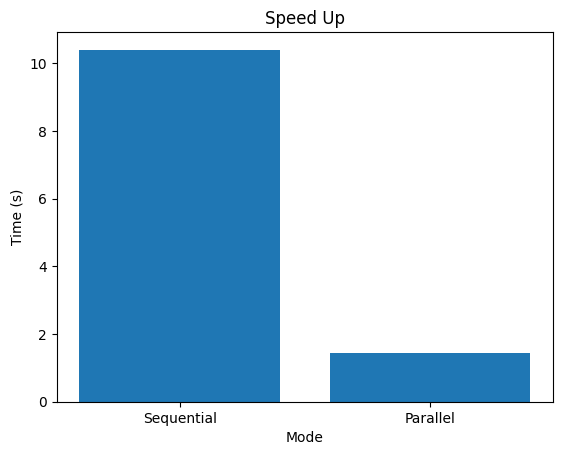

In [30]:
x_bar = ['Sequential','Parallel']
y_bar = [seq_time, par_time]

plt.bar(x_bar, y_bar)
plt.xlabel('Mode')
plt.ylabel('Time (s)')
plt.title('Speed Up')
plt.show()

In [61]:
client.close()
client.shutdown()